# Google drive setup

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
%cd My\ Drive/Network_Analysis

/gdrive/My Drive/Network_Analysis


In [5]:
pwd

'/gdrive/My Drive/Network_Analysis'

# Imports

In [6]:
pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24787 sha256=bf3eb4736e160fa71c2a89ebc65670bc61819f4e31a621e0ffa5a40ff39b9fc2
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [7]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
import numpy as np
from collections import Counter, defaultdict
from operator import itemgetter
import random
from itertools import chain
import statistics
import itertools
from scipy.stats import linregress
import seaborn as sns
import powerlaw

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# set matplotlib styling
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0) # default plots are app. same size as notebook
plt.style.use('ggplot')

In [9]:
import warnings

# Ignore two specific warning messages from the powerlaw package. 
# Comment these lines to show warnings
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in true_divide")

# Reading in network

In [10]:
import csv
file = '2016.csv'

with open(file, 'r') as fopen:
    q = csv.reader(fopen)
    setcounter = set()
    for i in q:
        e1,e2 = i[0].split(';')
        setcounter.add(e1)
        setcounter.add(e2)
    print(len(setcounter))

1236


In [11]:
file = '2016.csv'

# read collaboration network as undirected graph from edge list
US_air_traffic = nx.read_edgelist(file, delimiter=";",
                                   create_using=nx.MultiDiGraph())

# print summary of collaboration network
print(nx.info(US_air_traffic))

Name: 
Type: MultiDiGraph
Number of nodes: 1236
Number of edges: 246412
Average in degree: 199.3625
Average out degree: 199.3625


# US air traffic (2016) - Exercise 2

## Necessary functions:

In [12]:
# An easy way to plot the content of the counters
#I create this function because I will plot a lot of probability distribution functions in this notebook
def plot_counter(counter,xlabel = '',ylabel = '',prob = True,**params):
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    p_y = y / np.sum(y) #probability of y
    
    if prob:
        y = p_y
    
    plt.clf()
    plt.subplot(121)
    plt.title('Linear Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.plot(x, y, "ro")

    plt.subplot(122)
    plt.title('Logarithmic Scale')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.loglog(x, y, "ro")
    
    if params.get('has_legend',False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))
    
    plt.show()

In [13]:
def get_largest_strong_component(DiGraph):
    components_sorted = sorted( nx.strongly_connected_components(DiGraph) , key=len, reverse=True )
    return DiGraph.subgraph( components_sorted[0])

In [14]:
def get_sampled_shortest_path_lens(Graph , number_of_paths = 10000):
    
    path_lens = []
    
    for i in range(number_of_paths):
        
        #if i % 100 == 0:
        #   print(i)
        
        nodes = random.sample(Graph.nodes(),2) # RS: explain that with this you avoid taking the shortest path between a node and itself
        shortest_path = nx.shortest_path(Graph, source=nodes[0], target=nodes[1])
        path_lens.append(len(shortest_path))
    
    return path_lens

In [15]:
def hist_counter(counter,xlabel = '',ylabel = '',prob = True,**params):
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    p_y = y / np.sum(y) #probability of y
    
    if prob:
        y = p_y

    plt.clf()
    plt.subplot(121)
    plt.title('Shortest path distribution')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
        
    plt.bar(x ,y)
    
    if params.get('has_legend',False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))

    plt.show()

## Degrees, in- and out-degree distributions

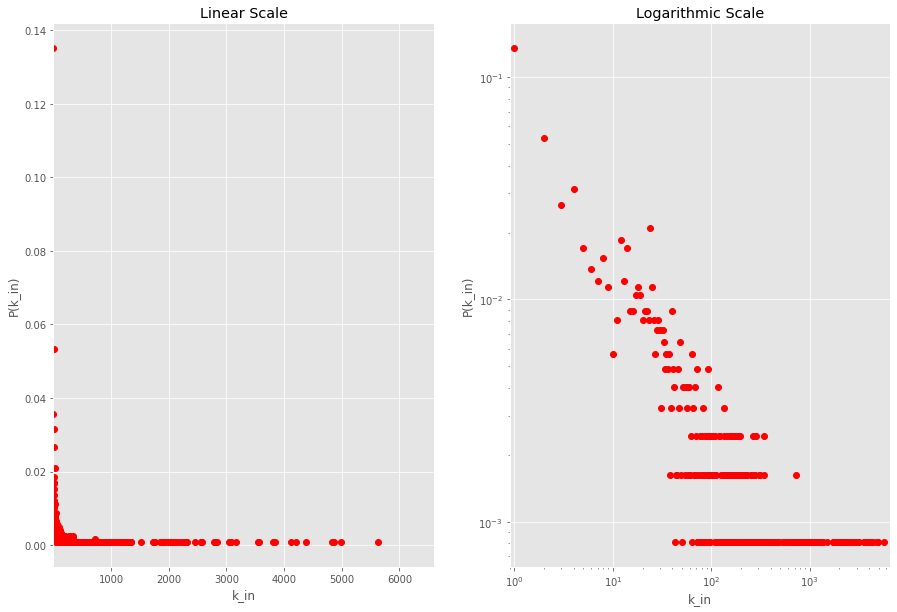

Largest in degree of any node in the network: 7100


In [16]:
in_degree_count = Counter(dict(US_air_traffic.in_degree).values())

plot_counter(in_degree_count,xlabel =  'k_in',ylabel ='P(k_in)',
            has_xlim = True, left = 0.9, right = 6600)

print("Largest in degree of any node in the network: {}"
      .format(max(in_degree_count.keys())))

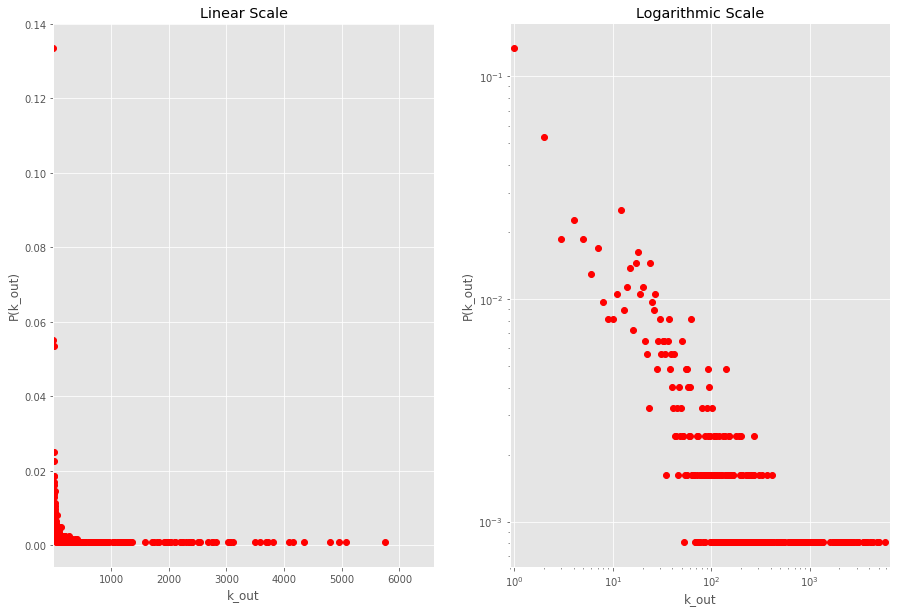

Largest out degree of any node in the network: 7166


In [17]:
out_degree_count = Counter(dict(US_air_traffic.out_degree).values())

plot_counter(out_degree_count,xlabel =  'k_out',ylabel ='P(k_out)',
            has_xlim = True, left = 0.9, right = 6600)
print("Largest out degree of any node in the network: {}"
      .format(max(out_degree_count.keys())))

In [18]:
Counter(dict(US_air_traffic.out_degree))

Counter({'10005': 10,
         '11630': 1954,
         '10006': 3,
         '10170': 483,
         '10011': 49,
         '10661': 85,
         '11399': 45,
         '11869': 71,
         '12745': 7,
         '14081': 96,
         '10015': 6,
         '10016': 4,
         '12184': 257,
         '10030': 1,
         '10033': 15,
         '10299': 3722,
         '14709': 433,
         '11555': 235,
         '10039': 2,
         '10040': 1,
         '10041': 1,
         '10042': 15,
         '10056': 14,
         '10278': 20,
         '11299': 3,
         '12705': 17,
         '12782': 15,
         '12785': 10,
         '12854': 14,
         '12869': 11,
         '15091': 19,
         '15446': 10,
         '10065': 2,
         '10076': 5,
         '10085': 5,
         '10122': 1,
         '15249': 244,
         '10135': 298,
         '11057': 3575,
         '14100': 3805,
         '11433': 5068,
         '10397': 4954,
         '11973': 631,
         '12889': 3123,
         '12324': 150,
 

## Strongly and weakly connected components

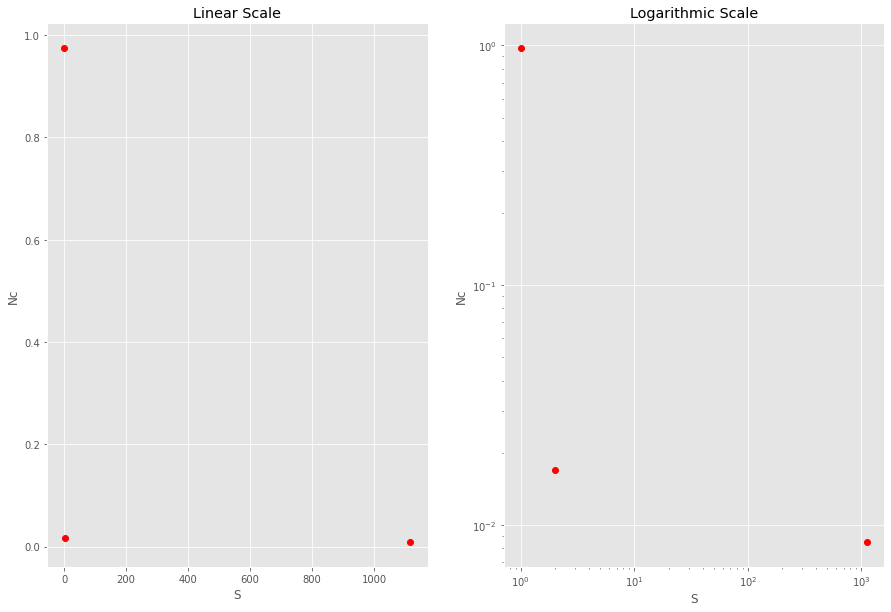

The largest strongly connected component in the network includes 1117 nodes


In [19]:
strong_component_lens = [len(c) for c in nx.strongly_connected_components(US_air_traffic)]
strong_component_size_count = Counter(strong_component_lens)
plot_counter(strong_component_size_count,xlabel = 'S', ylabel = 'Nc')
print("The largest strongly connected component in the network includes {} nodes".format(max(strong_component_size_count.keys())))

A weakly connected component in a directed graph is a subgraph 
where all pair of nodes are connected by a shortest path if we do not take into account the direction of the edges. A strongly connected component is a subgraph where you can get from any node to any other node using the edge direction.

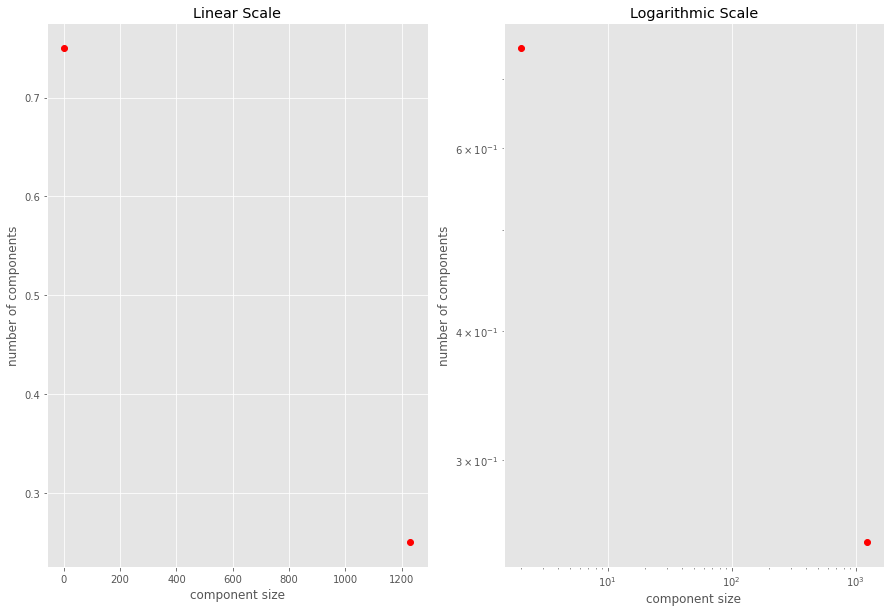

The largest weakly connected component in the network includes 1230 nodes


In [20]:
weak_component_lens = [len(c) for c in nx.weakly_connected_components(US_air_traffic)]
weak_component_size_count = Counter(weak_component_lens)
plot_counter(weak_component_size_count,xlabel = "component size", ylabel = "number of components")
print("The largest weakly connected component in the network includes {} nodes"
      .format(max(weak_component_size_count.keys())))

## Shortest paths

In [21]:
largest_strong_component = get_largest_strong_component(US_air_traffic)
shortest_path_len_counts = Counter(get_sampled_shortest_path_lens(largest_strong_component))

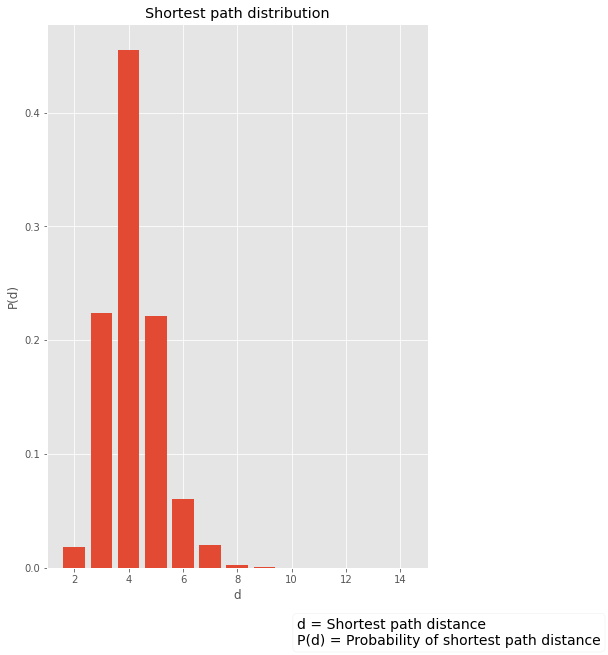

The longest sampled shortest path in the largest connected component of the network is 9 long.


In [22]:
hist_counter(shortest_path_len_counts,ylabel = "P(d)",xlabel = "d",has_legend = True
             ,xmeaning = ' Shortest path distance', ymeaning = ' Probability of shortest path distance',
            has_xlim = True, left = 1, right = 15)

print("The longest sampled shortest path in the largest connected component of the network is {} long."
      .format(max(shortest_path_len_counts.keys()))) 

I need to take the largest strongly connected component because this is the only way that I can make sure there is a path between two nodes that I sample.

## Network with weights

In [23]:
edges = []
for u,v,d in US_air_traffic.out_edges:
    edges.append([(u,v)])
edges

[[('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('10005', '11630')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630', '10184')],
 [('11630',

In [24]:
count = Counter(chain(*edges))
count

Counter({('10005', '11630'): 10,
         ('11630', '10184'): 48,
         ('11630', '10225'): 30,
         ('11630', '10247'): 69,
         ('11630', '10396'): 25,
         ('11630', '10754'): 43,
         ('11630', '10775'): 51,
         ('11630', '11833'): 78,
         ('11630', '11844'): 68,
         ('11630', '12214'): 55,
         ('11630', '12615'): 46,
         ('11630', '12868'): 50,
         ('11630', '13767'): 27,
         ('11630', '13768'): 47,
         ('11630', '14125'): 23,
         ('11630', '14474'): 49,
         ('11630', '14709'): 51,
         ('11630', '10299'): 109,
         ('11630', '12141'): 12,
         ('11630', '15236'): 24,
         ('11630', '14747'): 25,
         ('11630', '12523'): 12,
         ('11630', '12819'): 12,
         ('11630', '14828'): 12,
         ('11630', '15725'): 47,
         ('11630', '10005'): 13,
         ('11630', '10052'): 2,
         ('11630', '10064'): 2,
         ('11630', '10349'): 46,
         ('11630', '10923'): 5,
         ('1

# US air traffic (2016) - Exercise 3

## Necessary functions:

In [25]:
def plot_cumulative_distribution(values, bins = 100,xlabel = '',ylabel = '', 
                                 title = 'Complementary cumulative distribution',show = True ,hide_hist = True):
    """
    Shows the 1 - cumulative distribution of values.
    """
    n,x, _ = plt.hist(values , density= True, cumulative = True, bins = bins)
    
    if hide_hist:
        plt.close()
    
    # This line finds the middle of the histogram bins 
    bin_centers = 0.5*(x[1:]+x[:-1])
    #This line 1-bin height so this plot becomes a complementary cumulative distribution
    y = [1 - v for v in n] 
    
    
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().set_yscale("symlog", linthresh=0.00001)
    plt.gca().set_xscale("log")
    
    if show:
        plt.plot(bin_centers,y,'ro') ## using bin_centers rather than edges
        plt.show()
    else:
        plt.close()

        return bin_centers, y

In [26]:
def log_binned_prob_hist(values , bins_n = 15, logged = False,xlabel = 'k', ylabel = 'P(k)',
                         title = "Logarithmically binned degree distribution",show = True ,**params ):
    """
    This function shows a logarithmically binned histogram the input(values) is a list of integers or floats
    """
    maximum_value = params.get('maximum_value', max(values))          
    
    #This line is to create weights which are used to normalise input data so the output of the function is
    # a probability distribution
    weights = np.ones_like(values) / (len(values))
    
    #np.logspace generater num samples equally space out on a logscale 
    n,x, _  = plt.hist(values, bins=np.logspace(np.log10(1), np.log10(maximum_value), num = bins_n )
                       , weights = weights, log = True)
    plt.close()
    bin_centers = 0.5*(x[1:]+x[:-1])
    plt.gca().set_yscale("symlog", linthresh=0.0001)
    plt.gca().set_xscale("log")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.scatter(bin_centers,n)
    
    if show:
        plt.show()
    else:
        plt.close()
        return bin_centers ,n

In [27]:
def plot_counter(counter,degrees ,xlabel = '',ylabel = '',prob = True,**params):
    """
    The counter object is dictionary like object which containt a measure like a degree of a node as keys and
    the times it occured as values
    """
    
    lists = sorted(counter.items(), key = itemgetter(1)) # sorted by value
    x, y = zip(*lists) # unpack the list of keys, counts
    
    
    # If it is a probabilty distribution use the normalised y values
    p_y = y / np.sum(y) #probability of y
    if prob:
        y_s = p_y
    x_c, y_c = plot_cumulative_distribution(degrees ,show = False)
    x_l, y_l =log_binned_prob_hist(degrees ,show = False)
    
    plt.clf()
    
    plt.subplot(221)
    plt.title('Linear Scale')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.plot(x,y_s, "ro")
    
    
    plt.subplot(222)
    plt.title('Logarithmic Scale')
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.gca().set_yscale("symlog", linthresh=0.01)
    plt.gca().set_xscale("log")
    if params.get('has_xlim',False):
        plt.xlim(params['left'],params['right'])
    plt.loglog(x,y_s, "ro")

    plt.subplot(223)
    
    plt.gca().set_yscale("symlog", linthresh=0.01)
    plt.gca().set_xscale("log")
    plt.title("Logarithmically binned distribution")
    plt.xlabel('k')
    plt.ylabel('P(k)')
    plt.plot(x_l, y_l,'ro')
    
    plt.subplot(224)
    
    plt.title('Complementary cumulative distribution')
    plt.xlabel('x')
    plt.ylabel('P(x>k)')
    plt.gca().set_yscale("symlog", linthresh=0.01)
    plt.gca().set_xscale("log")
    plt.plot(x_c, y_c,'ro')
    
    # This part is responsable for the legend
    if params.get('has_legend', False):
        legend_text = xlabel + ' =' + params['xmeaning'] + '\n' + ylabel + ' =' + params['ymeaning']
        plt.annotate(legend_text, xy=(250, -50), xycoords='axes points',
            size=14, ha='left', va='top',
            bbox=dict(boxstyle='round', fc='w'))
   
    plt.show()

In [28]:
def get_largest_strong_component(DiGraph):
    
    components_sorted = sorted( nx.strongly_connected_components(DiGraph) , key=len, reverse=True )
    return DiGraph.subgraph( components_sorted[0] )

## In-degree distribution

In [29]:
USAirTraffic_in_degrees = list(dict(US_air_traffic.in_degree).values())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


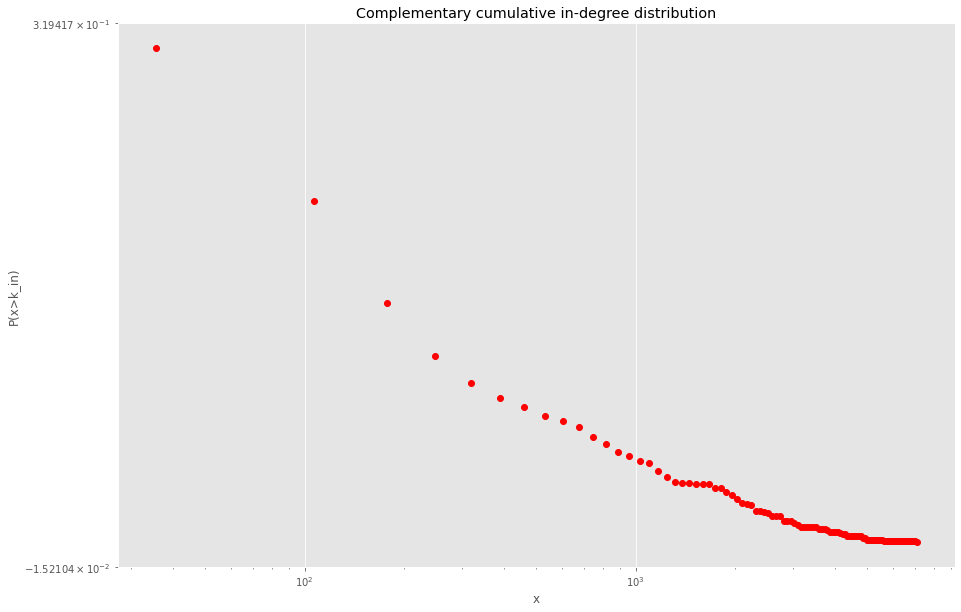

In [30]:
plot_cumulative_distribution(USAirTraffic_in_degrees,xlabel = 'x',ylabel = 'P(x>k_in)', 
                             title = 'Complementary cumulative in-degree distribution' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


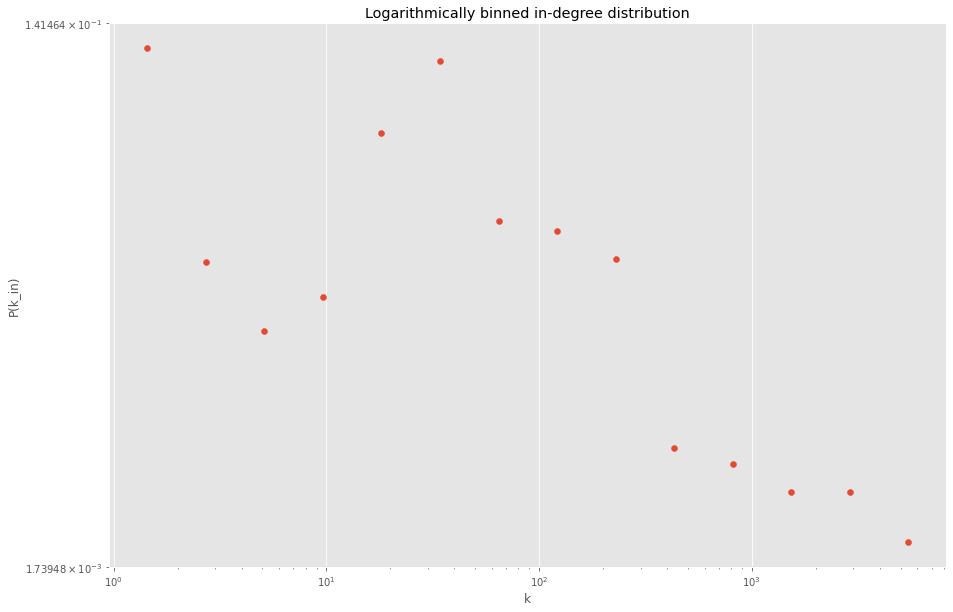

In [31]:
log_binned_prob_hist(USAirTraffic_in_degrees, logged = True, ylabel = 'P(k_in)', 
                     title = 'Logarithmically binned in-degree distribution')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will r

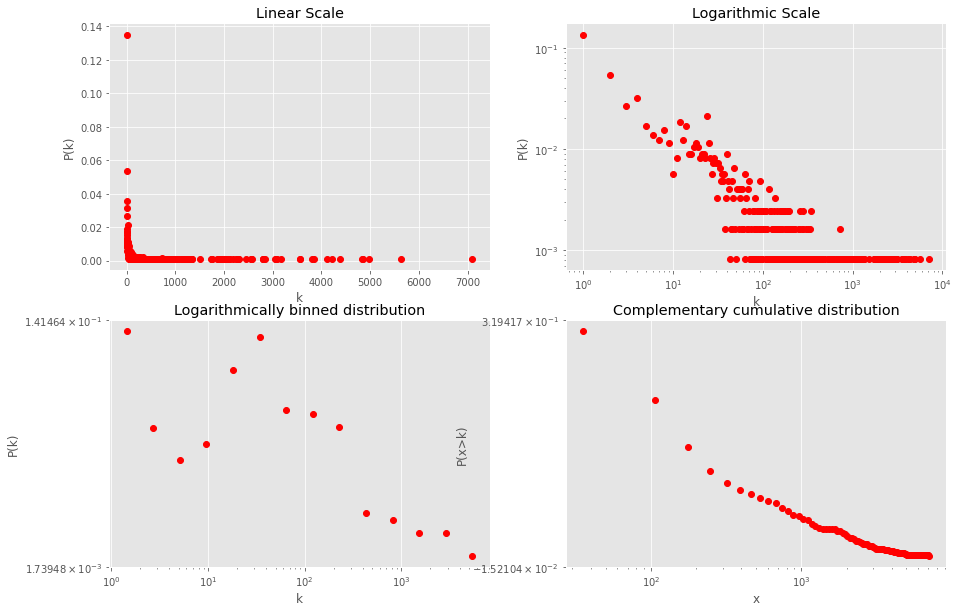

Largest in degree of any node in the collaboration network: 7100


In [32]:
in_degree_count = Counter(dict(US_air_traffic.in_degree).values())

plot_counter(in_degree_count, USAirTraffic_in_degrees,xlabel =  'k_in',ylabel ='P(k_in)')

print("Largest in degree of any node in the collaboration network: {}"
      .format(max(in_degree_count.keys())))

## Out-degree distribution

In [33]:
USAirTraffic_out_degrees = list(dict(US_air_traffic.out_degree).values())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


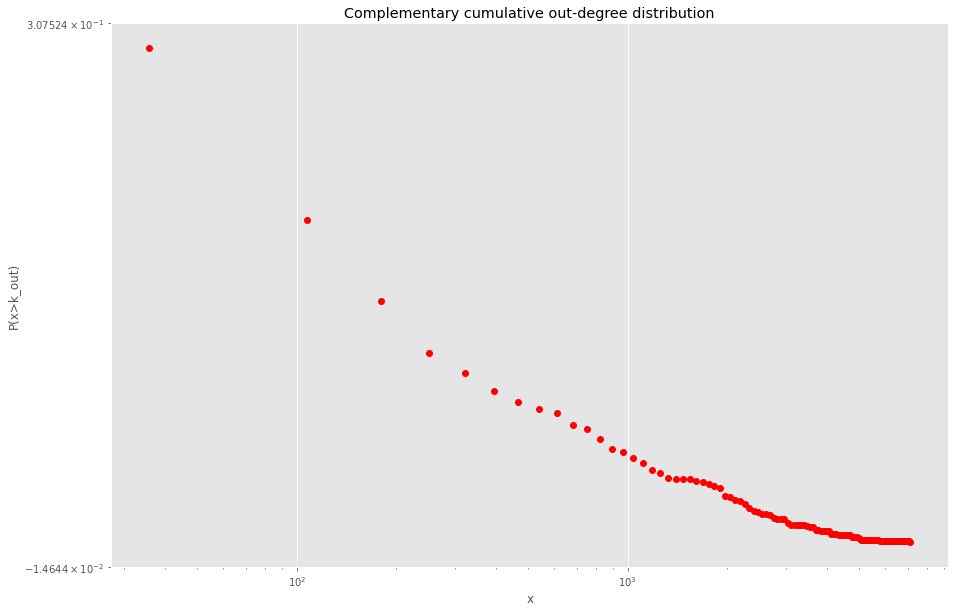

In [34]:
plot_cumulative_distribution(USAirTraffic_out_degrees,xlabel = 'x',ylabel = 'P(x>k_out)', 
                             title = 'Complementary cumulative out-degree distribution' )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError


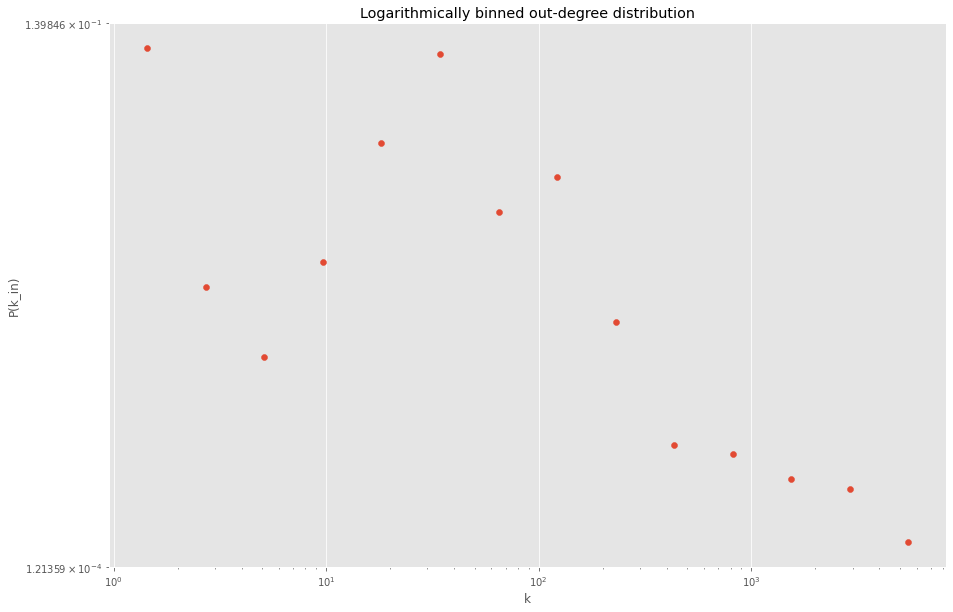

In [35]:
log_binned_prob_hist(USAirTraffic_out_degrees, logged = True, ylabel = 'P(k_in)', 
                     title = 'Logarithmically binned out-degree distribution')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will r

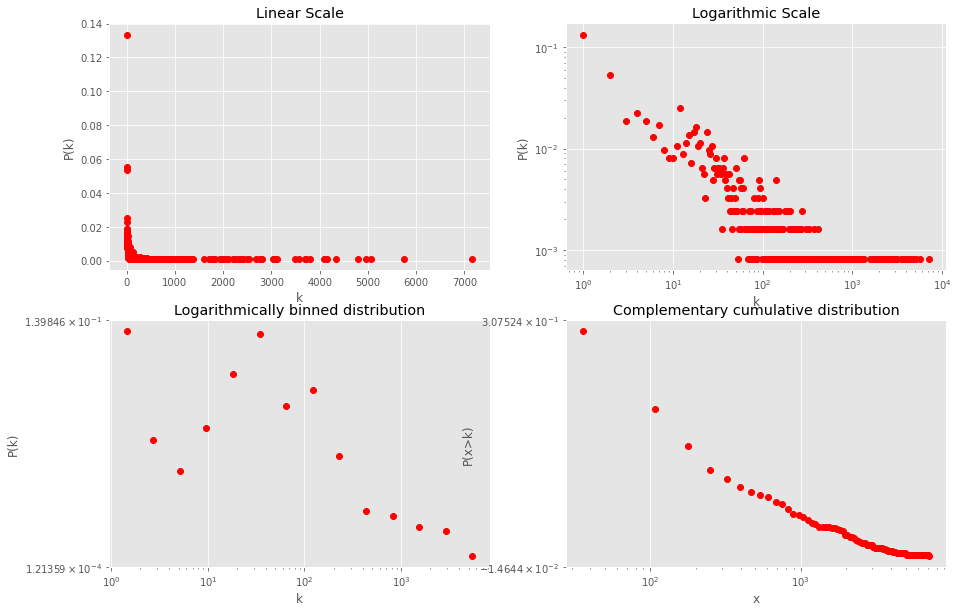

Largest in degree of any node in the collaboration network: 7166


In [36]:
out_degree_count = Counter(dict(US_air_traffic.out_degree).values())

plot_counter(out_degree_count,USAirTraffic_out_degrees,xlabel =  'k_in',ylabel ='P(k_in)')

print("Largest in degree of any node in the collaboration network: {}"
      .format(max(out_degree_count.keys())))

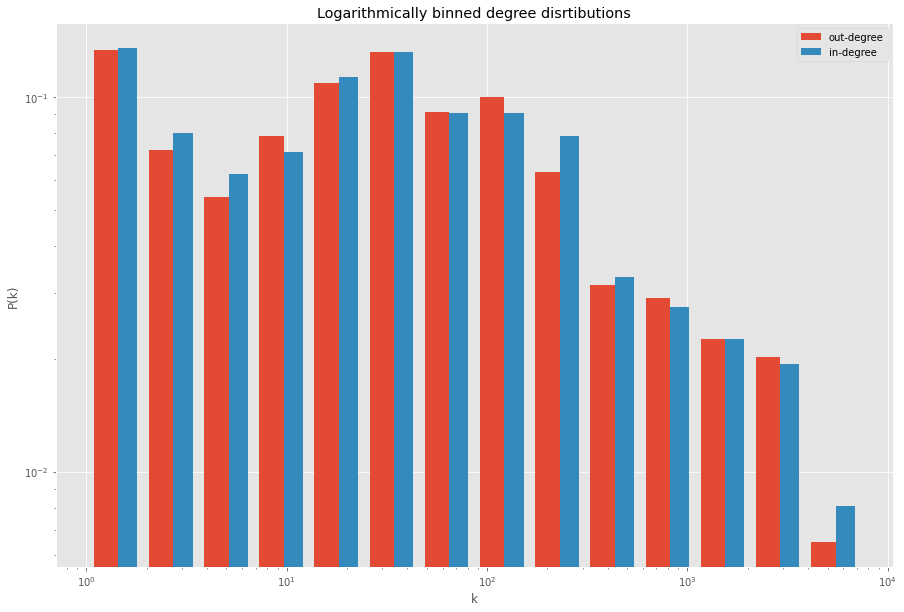

In [37]:
weights = np.ones_like(USAirTraffic_out_degrees) / (len(USAirTraffic_out_degrees))

names = ['out-degree', 'in-degree']
plt.hist([USAirTraffic_out_degrees,USAirTraffic_in_degrees], 
         bins=np.logspace(np.log10(1),np.log10(max(USAirTraffic_out_degrees)),num = 15), weights = [weights,weights], label=names)
plt.gca().set_xscale("log")
plt.title("Logarithmically binned degree disrtibutions")
plt.legend()
plt.ylabel("P(k)")
plt.xlabel('k')

plt.yscale('log')
plt.show()

## Centrality measures

In [39]:
USAirTraffic_betweeness = nx.betweenness_centrality(nx.DiGraph(US_air_traffic), k = 1000)

In [40]:
USAirTraffic_in_degree_cent = nx.in_degree_centrality(US_air_traffic)

In [41]:
USAirTraffic_out_degree_cent = nx.out_degree_centrality(US_air_traffic)

In [42]:
USAirTraffic_sampled_nodes = random.sample(get_largest_strong_component(US_air_traffic).nodes(),1000)

In [43]:
USAirTraffic_closeness = {}
cnt = 0
for node in USAirTraffic_sampled_nodes:
   #cnt += 1
   #if  cnt%100 == 0:
   #    print(cnt)
    USAirTraffic_closeness[node] = nx.closeness_centrality(get_largest_strong_component(US_air_traffic),u = node)

In [44]:
USAirTraffic_eigen = nx.eigenvector_centrality(US_air_traffic,max_iter = 200)

NetworkXNotImplemented: ignored

In [ ]:
weights = np.ones_like(list(USAirTraffic_in_degree_cent.values())) / (len(USAirTraffic_in_degree_cent.values()))
n,x, _ = plt.hist(list(USAirTraffic_in_degree_cent.values()), bins = 20, weights = weights)
plt.close()
bin_centers = 0.5*(x[1:]+x[:-1])
plt.gca().set_yscale("symlog", linthresh=0.0001)
plt.scatter(bin_centers,n)
plt.title('In degree centrality distribution')
plt.xlabel('C_d_in')
plt.ylabel('P(C_d_in)')
plt.show()
print(max(USAirTraffic_in_degree_cent.values()))

In [ ]:
weights = np.ones_like(list(USAirTraffic_out_degree_cent.values())) / (len(USAirTraffic_out_degree_cent.values()))
n,x, _ =plt.hist(list(USAirTraffic_out_degree_cent.values()), bins = 20, weights = weights)
plt.close()
bin_centers = 0.5*(x[1:]+x[:-1])
plt.gca().set_yscale("symlog", linthresh=0.0001)
plt.scatter(bin_centers,n)
plt.title('Out degree centrality distribution')
plt.xlabel('C_d_out')
plt.ylabel('P(C_d_out)')
plt.show()
print(max(USAirTraffic_out_degree_cent.values()))

In [ ]:
weights = np.ones_like(list(USAirTraffic_betweeness.values())) / (len(USAirTraffic_betweeness.values()))
n,x, _ = plt.hist(list(USAirTraffic_betweeness.values()), bins = 20, weights = weights)
plt.close()
bin_centers = 0.5*(x[1:]+x[:-1])
plt.gca().set_yscale("symlog", linthresh=0.000001)
plt.scatter(bin_centers,n)
plt.title('Betweenness centrality distribution')
plt.xlabel('C_b')
plt.ylabel('P(C_b)')
plt.show()
print(max(USAirTraffic_betweeness.values()))

In [ ]:
weights = np.ones_like(list(USAirTraffic_closeness.values())) / (len(USAirTraffic_closeness.values()))
n,x, _ = plt.hist(list(USAirTraffic_closeness.values()), bins = 20, weights = weights)
plt.close()
bin_centers = 0.5*(x[1:]+x[:-1])
plt.gca().set_yscale("symlog", linthresh=0.01)
plt.scatter(bin_centers,n)
plt.title('Closeness centrality distribution')
plt.xlabel('C_c')
plt.ylabel('P(C_c)')
plt.show()
print(max(USAirTraffic_closeness.values()))

In [ ]:
weights = np.ones_like(list(USAirTraffic_eigen.values())) / (len(USAirTraffic_eigen.values()))
n,x, _ =plt.hist(list(USAirTraffic_eigen.values()), bins = 20, weights = weights)
plt.close()
bin_centers = 0.5*(x[1:]+x[:-1])
plt.gca().set_yscale("symlog", linthresh=0.001)
plt.scatter(bin_centers,n)
plt.title('Eigen centrality distribution')
plt.xlabel('C_d')
plt.ylabel('P(C_d)')
plt.show()
print(max(USAirTraffic_eigen.values()))

In [ ]:
vectors = {}
vectors['in_degree_centralities'] = []
vectors['out_degree_centralities'] = []
vectors['betweenness_centralities'] = []
vectors['closeness_centralities'] = []
vectors['eigen_centralities'] = []
vectors['keys'] = []
for key in email_closeness.keys():
    vectors['keys'].append(key)
    vectors['in_degree_centralities'].append(USAirTraffic_in_degree_cent[key])
    vectors['out_degree_centralities'].append(USAirTraffic_out_degree_cent[key])
    vectors['betweenness_centralities'].append(USAirTraffic_betweeness[key])
    vectors['closeness_centralities'].append(USAirTraffic_closeness[key])
    vectors['eigen_centralities'].append(USAirTraffic_eigen [key])
centrality_df = pd.DataFrame.from_dict(vectors,orient='index').transpose()
centrality_df = centrality_df.set_index('keys')

In [ ]:
corr_mat= centrality_df.astype(float).corr('spearman')
sns.heatmap(corr_mat, annot = True)
plt.title('Centrality correlation matrix')
plt.show()

# US air traffic (2016) - Exercise 4

# US air traffic (2016) - Exercise 5

### Necessary functions:

In [ ]:
def make_configuration_model(G):
    """
    Constructs a configuration model corresponding to the given network
        @G (NetworkX Graph or Digraph)
    Returns
        NetworkX MultiGraph or MultiDiGraph
    """
    
    # if graph is directed, use make_directed_configuration_model()
    if nx.is_directed(G):
        return make_directed_configuration_model(G)
    
    # initialize multi-graph
    conf_model = nx.MultiGraph()
    
    # get degree sequence
    degree_seq = list(dict(G.degree).values())
    
    stubs = []
    
    # loop over each node degree and add stubs as tuples
    for idx, degree in enumerate(degree_seq):    
        for i in range(degree):
            stubs.append( (idx, i) )
    
    while len(stubs) > 0:
        # pop two stubs at random positions
        stub1 = stubs.pop(random.randint(0, len(stubs) - 1))
        stub2 = stubs.pop(random.randint(0, len(stubs) - 1))
        
        # add edge between nodes in each stub
        conf_model.add_edge(stub1[0], stub2[0])
    
    return conf_model


def make_directed_configuration_model(G):
    """
    Constructs a configuration model corresponding to the given directed network
        @G (NetworkX DiGraph)
    Returns
        NetworkX MultiDiGraph
    """
    
    conf_model = nx.MultiDiGraph()
    
    # get degree sequences
    in_degree_seq = list(dict(G.in_degree).values())
    out_degree_seq = list(dict(G.out_degree).values())
    
    in_stubs = []
    out_stubs = []
    
    # loop over each node in-degree and add stubs as tuples
    for idx, degree in enumerate(in_degree_seq):    
        for i in range(degree):
            in_stubs.append( (idx, i) )
            
    # loop over each node out-degree and add stubs as tuples
    for idx, degree in enumerate(out_degree_seq):    
        for i in range(degree):
            out_stubs.append( (idx, i) )
    
    # loop over each out-degree stub and connect to a random in-degree stub
    for node, edgenum in out_stubs:
        in_stub = in_stubs.pop(random.randint(0, len(in_stubs) - 1))
        conf_model.add_edge(node, in_stub[0])
    
    return conf_model

In [ ]:
def plot_ccdf_with_fits(fitoutput_original, fitoutput_configuration):
    """
    Plots complement of a cumulative distribution (CCDF) with distributions fits from the output of two 
    degree distributions fitted using the powerlaw package
        @fitoutput_original: Output of powerlaw.Fit() to the degree distribution of a real-world network 
        @fitoutput_configuration: Output of powerlaw.Fit() to the degree distribution of a configuration model
    """
    # initilize subplots
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
    
    # plot CCDF of original network
    fitoutput_original.plot_ccdf(ax=ax1, label='Original network: CCDF', linestyle='--', marker='v')
    
    # add fitted powerlaw,lognormal CCDF plots as dashed lines
    fitoutput_original.power_law.plot_ccdf(ax=ax1, color='#f54e42', linestyle='-', 
                                           label='Original network: power-law fit')

    fitoutput_original.lognormal.plot_ccdf(ax=ax1, color='#f5bc42', linestyle='-', 
                                           label='Original network: lognormal fit')

    ax1.set_title("Degree distribution CCDF for network and corresponding configuration model")
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$P(k>=x)$')
    
    
    # repeat for configuration model
    fitoutput_configuration.plot_ccdf(ax=ax1, label='Configuration: CCDF', linestyle='--', marker='^')
    
    # add fitted powerlaw, lognormal CCDF plots as dashed lines
    fitoutput_configuration.power_law.plot_ccdf(ax=ax1, color='#085087', linestyle='--', 
                                                label='Configuration: power-law fit')
    fitoutput_configuration.lognormal.plot_ccdf(ax=ax1, color='#5e98c4', linestyle='--', 
                                                label='Configuration: lognormal fit')

    ax1.legend()

    plt.show()
    
    
def compare_distributions(title, dist1, dist2, xlabel, log=False, bins=20):
    """
    Plots two distributions on a single plot. 
    Plots histogram output as scatter plot with x-ticks marking bin centers 
        @title: plot title
        @dist1 (list): distribution from original network
        @dist2 (list): ditribution from random network null model
        @xlabel (str): label on x-axis
        @log (boolean): If True, logscales y-axis
        @bins (int or list): number of histogram bins or list with pre-defined bin edges
    """
        
    # get histogram scatter points of distribution 1
    n_1, x_1, _ = plt.hist(dist1, bins = bins)
    bin_centers_1 = 0.5*(x_1[1:]+x_1[:-1])
    plt.close()
    
    # get histogram scatter points of distribution 2
    n_2, x_2, _ = plt.hist(dist2, bins = bins)
    bin_centers_2 = 0.5*(x_2[1:]+x_2[:-1])
    plt.close()
    
    # initilize subplots
    fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))
    
    # set y logscale if specified
    if log:
        ax1.set_yscale("symlog")

    
    # plot distribution from original network
    ax1.scatter(bin_centers_1, n_1, label='Original network', s=100)
    
    # add mean as vertical line
    ax1.axvline(x=np.mean(dist1), label='Org. network mean: {:.3}'.format(np.mean(dist1)), 
                color='#f2ada2', linestyle='--')
    
    
    # if bins is list, set x-ticks as bin centers and rotate xlabels 
    if isinstance(bins, list):
        ax1.set_xticks(bin_centers_1)
        ax1.set_xlim(min(bins), max(bins))
        ax1.tick_params(axis='x', labelrotation=90)

    ax1.set_title(title)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Frequency")
        
    # plot distribution from Configuration network
    ax1.scatter(bin_centers_2, n_2, label='Configuration network', s=100)
    ax1.axvline(x=np.mean(dist2), label='Conf. network mean: {:.3}'.format(np.mean(dist2)), 
                color='#9fc1d6', linestyle='--')

    ax1.legend(loc='best')

    plt.show()

In [ ]:
def sample_shortest_path_lengths(G, n=1000):
    """
    Samples n shortest lengths from random pairs of n nodes in the network
    """
    sp_lengths = []
    
    # extract all nodes and shuffle order
    nodes = list((G.nodes()))
    random.shuffle(nodes)
    
    # get all pairs of n nodes and shuffle pairs
    node_pairs = list(itertools.combinations(nodes[:n], 2))
    random.shuffle(node_pairs)
    
    # take shortest path length until n lengths is reached
    for source, target in node_pairs:
        if not nx.has_path(G, source, target):
            continue
            
        sp_lengths.append(len(nx.shortest_path(G, source, target)))
        if len(sp_lengths) > n:
            break
    
    return sp_lengths

In [ ]:
def plot_component_distributions(G_original, G_configuration, title, 
                                 component_method=nx.connected_components):
    """
    Visualizes component size distributions for a network and its configuration 
    network counterpart. Does not use binning.
        @G_original (NetworkX Graph): Original network
        @G_configuration (NetworkX Graph): Configuration network
        @title (str): Plot title
        @component_method: NetworkX method to extract components, e.g. nx.connected_components
    """
    
    # get number of nodes for normalization
    num_nodes = nx.number_of_nodes(G_original)
    
    # count distinct values using Counter. Normalize component sizes by number of nodes
    cnt_original = Counter([len(comp) / num_nodes for comp in component_method(G_original)])
    cnt_configuration = Counter([len(comp) / num_nodes for comp in component_method(G_configuration)])
    
    fig, ax = plt.subplots()
    # plot counter values using scatter plots
    ax.scatter(x=list(cnt_original.keys()), y=list(cnt_original.values()), 
               label='Original network', s=100)
    ax.scatter(x=list(cnt_configuration.keys()), y=list(cnt_configuration.values()), 
               label='Configuration network', s=100)
    
    # set log-log scale
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # set x-axis limits such that components with 1 node and all nodes will be visible
    ax.set_xlim((1 / num_nodes) * 0.8, 1.1)
    
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Proportion of nodes in component")
    ax.set_ylabel("Frequency")

    plt.show()

## Creating configuration model

In [ ]:
# create Collaboration configuration model
US_air_traffic_conf = make_configuration_model(US_air_traffic)

print("Original US air traffic network:")
print(nx.info(US_air_traffic))
print("Number of self-loops: {}"
     .format(nx.number_of_selfloops(US_air_traffic)))

print("\n\nUS air traffic network configuration model:")
print(nx.info(US_air_traffic_conf))
print("Number of self-loops: {}"
     .format(nx.number_of_selfloops(US_air_traffic_conf)))

## Degree distributions (CCDF)

In [ ]:
# extract in-degree distributions
USAirTraffic_fitoutput_in = powerlaw.Fit(list(dict(US_air_traffic.in_degree).values()), verbose=False)
USAirTraffic_configuration_fitoutput_in = powerlaw.Fit(list(dict(US_air_traffic_conf.in_degree).values()), verbose=False)

plot_ccdf_with_fits(USAirTraffic_fitoutput_in, USAirTraffic_configuration_fitoutput_in)

In [ ]:
# extract and compare out-degree distributions
USAirTraffic_fitoutput_out = powerlaw.Fit(list(dict(US_air_traffic.out_degree).values()), verbose=False)
USAirTraffic_configuration_fitoutput_out = powerlaw.Fit(list(dict(US_air_traffic_conf.out_degree).values()), verbose=False)
plot_ccdf_with_fits(USAirTraffic_fitoutput_out, USAirTraffic_configuration_fitoutput_out)

Both in-degree and out-degree distributions are visually identical between the original network and its configuration model.  

Next, we visualize the distribution of (local) clustering coefficients. Note that the configuration model is converted to a 'regular' `DiGraph` as the `clustering()` method is undefined for MultiDiGraphs. 

## Clustering coefficients

In [ ]:
USAirTraffic_cc_dist = list(dict(nx.clustering(nx.DiGraph(US_air_traffic))).values())
USAirTraffic_configuration_cc_dist = list(dict(nx.clustering(nx.DiGraph(US_air_traffic_conf))).values())

compare_distributions('Clustering coefficient distribution - US Air Traffic network \n(linear binning)', 
                      USAirTraffic_cc_dist, USAirTraffic_configuration_cc_dist, "Clustering coefficient", 
                      log=True, bins=[-0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 
                                      0.55, 0.65, 0.75, 0.85, 0.95, 1.05])

## Shortest paths

Next, we sample 5000 shortest paths from each network:

In [ ]:
# sample 5000 shortest path lengths from each network
shortest_paths_USAirTraffic = sample_shortest_path_lengths(US_air_traffic, n=5000)
shortest_paths_USAirTraffic_configuration = sample_shortest_path_lengths(US_air_traffic_conf, n=5000)

compare_distributions('Shortest path length distribution - US Air Traffic network \n(linear binning)', 
                      shortest_paths_USAirTraffic, shortest_paths_USAirTraffic_configuration, 
                      "Shortest path length", log=True, 
                      bins=list(np.linspace(-1, 14, 16, endpoint=True))) # note that max is hard-set to 14.5

## Connectivity

As for the distributions of **component sizes**, we now operate under two separate definitions of connectedness: weak and strong connectivity.  

We begin by visualizing the distribution of weakly connected component sizes:

In [ ]:
print("Number of weakly connected components in US Air Traffic network: {}"
      .format(nx.number_weakly_connected_components(US_air_traffic)))
print("Number of weakly connected components in corresponding configuration network: {}"
      .format(nx.number_weakly_connected_components(US_air_traffic_conf)))

plot_component_distributions(US_air_traffic, US_air_traffic_conf, 
                             "Weakly connected components size distribution \n (not binned)", 
                             component_method=nx.weakly_connected_components)

We repeat the process, this time for strongly connected components: 

In [ ]:
print("Number of strongly connected components in US Air Traffic network: {}"
      .format(nx.number_strongly_connected_components(US_air_traffic)))
print("Number of strongly connected components in corresponding configuration network: {}"
      .format(nx.number_strongly_connected_components(US_air_traffic_conf)))

plot_component_distributions(US_air_traffic, US_air_traffic_conf, 
                             "Strongly connected components size distribution \n (not binned)", 
                             component_method=nx.strongly_connected_components)

## Centrality

Finally, we visualize the **centrality distribution** using eigenvector centrality:

In [ ]:
USAirTraffic_centrality = list(dict(nx.eigenvector_centrality(nx.DiGraph(US_air_traffic))).values())
USAirTraffic_configuration_centrality = list(dict(nx.eigenvector_centrality(nx.DiGraph(US_air_traffic_conf))).values())

compare_distributions('Eigenvector centrality distribution - US Air Traffic network \n(linear binning)', 
                      USAirTraffic_centrality, USAirTraffic_configuration_centrality, "Eigenvector centrality", 
                      log=True, bins=list(np.linspace(min(USAirTraffic_centrality + USAirTraffic_configuration_centrality), 
                                                      max(USAirTraffic_centrality + USAirTraffic_configuration_centrality),
                                                      10, endpoint=True)))